In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 45000

N_EPOCHS = 100
train_rmse_list = []
test_rmse_list = []

In [3]:
x = tf.placeholder(tf.float32, [None,3])
w = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.zeros([1]))

In [4]:
def fwdNode(x, w, b):
    Input = tf.add(tf.matmul(x,w), b)
    Output = tf.nn.relu(Input)
    return Output

In [5]:
#Feed
Pred = fwdNode(x, w, b)

In [6]:
L1 = tf.placeholder(tf.float32, [None,3])
Out = tf.placeholder(tf.float32, [None,3])
cost_func = tf.reduce_mean(tf.square(Out - Pred))
#train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)

In [7]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [8]:
X_train = X[:MY_BOUNDED_SET]
X_test = X[MY_BOUNDED_SET:]
y_train = y[:MY_BOUNDED_SET]
y_test = y[MY_BOUNDED_SET:]

In [9]:
# Evaluation
rmse_a = tf.placeholder(tf.float32, [None, 3])
rmse_b = tf.placeholder(tf.float32, [None, 3])
rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))

In [10]:
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    
    sess.run(init)
    #print (sess.run(rmse_a))
    for epoch in range(N_EPOCHS):
        #print (epoch + 1)
        sess.run(train_step, feed_dict = {x:X_train, Out:y_train})
        train_pred = sess.run(Pred, feed_dict = {x:X_train})
        train_rmse = sess.run(cost_func, feed_dict={x: X_train, Out:y_train})
        train_rmse_list += [train_rmse]
       # print (sess.run(cost_func, feed_dict ))
        pred = sess.run(Pred, feed_dict = {x:X_test})
        test_rmse = sess.run(cost_func, feed_dict={x: X_test, Out:y_test})
        #print ("\nEpoch : ", (epoch+1), "\nRMSE : ", my_rmse)
        #print (pred)
        #print (sess.run(rmse, feed_dict = {rmse_a:X_test, rmse_b:y_test}))
        test_rmse_list += [test_rmse]

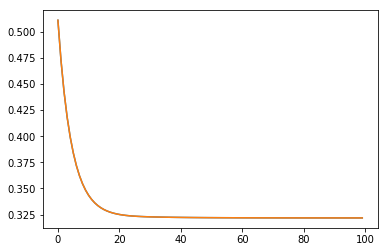

In [12]:
#TRAIN RMSE RELU
plt.plot(list(enumerate(range(len(train_rmse_list)))),train_rmse_list)

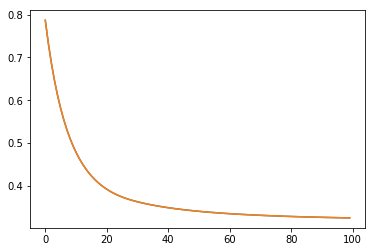

In [13]:
#TEST RMSE RELU
plt.plot(list(enumerate(range(len(test_rmse_list)))),test_rmse_list)
#what

In [14]:
train_rmse_list

[0.51082385,
 0.47245705,
 0.4421698,
 0.41819263,
 0.39916116,
 0.384021,
 0.37194481,
 0.3622928,
 0.35456678,
 0.3483704,
 0.34339693,
 0.33939573,
 0.33617863,
 0.33358443,
 0.33149436,
 0.3298077,
 0.3284455,
 0.32734415,
 0.3264526,
 0.32573313,
 0.3251481,
 0.32467487,
 0.32428992,
 0.32397643,
 0.3237206,
 0.3235115,
 0.3233395,
 0.3231974,
 0.32307786,
 0.32297626,
 0.3228868,
 0.3228059,
 0.32273284,
 0.32266676,
 0.32260644,
 0.32255146,
 0.32250124,
 0.32245544,
 0.32241336,
 0.3223748,
 0.32233924,
 0.32230657,
 0.32227594,
 0.32224795,
 0.32222217,
 0.32219833,
 0.32217616,
 0.32215548,
 0.32213622,
 0.32211822,
 0.32210162,
 0.32208604,
 0.3220719,
 0.3220583,
 0.32204574,
 0.32203403,
 0.3220231,
 0.32201284,
 0.3220031,
 0.32199413,
 0.32198554,
 0.32197782,
 0.3219703,
 0.3219633,
 0.32195672,
 0.32195067,
 0.32194492,
 0.32193932,
 0.32193428,
 0.32192934,
 0.3219249,
 0.32192054,
 0.3219165,
 0.32191274,
 0.3219091,
 0.32190567,
 0.3219024,
 0.3218994,
 0.32189664,


In [15]:
test_rmse_list

[0.7867978,
 0.73244005,
 0.6858136,
 0.64565396,
 0.6109255,
 0.5807857,
 0.55452704,
 0.5315752,
 0.5114488,
 0.49374607,
 0.47814617,
 0.4643448,
 0.45213073,
 0.44127694,
 0.4316281,
 0.42303264,
 0.41535455,
 0.40848935,
 0.40234601,
 0.39684626,
 0.39190078,
 0.38746125,
 0.3834692,
 0.37987518,
 0.37662753,
 0.37369868,
 0.37103483,
 0.36862928,
 0.36643374,
 0.36442712,
 0.3625639,
 0.36081186,
 0.35916188,
 0.35760623,
 0.35613018,
 0.35473096,
 0.35340714,
 0.352151,
 0.35095915,
 0.34982532,
 0.34874773,
 0.34771824,
 0.34673482,
 0.3457998,
 0.3449065,
 0.34405407,
 0.34323907,
 0.34245586,
 0.34170905,
 0.3409917,
 0.3403051,
 0.3396444,
 0.33901373,
 0.33840585,
 0.33782384,
 0.3372634,
 0.33672658,
 0.3362099,
 0.33571163,
 0.33523193,
 0.33476993,
 0.33432704,
 0.33389637,
 0.33348113,
 0.33308214,
 0.33269826,
 0.33232683,
 0.33196712,
 0.3316211,
 0.33128497,
 0.33096254,
 0.3306506,
 0.33034566,
 0.3300535,
 0.32977125,
 0.32949793,
 0.3292322,
 0.32897505,
 0.328726